In [362]:
import netCDF4
from matplotlib import pyplot as plt
import numpy as np
import xarray as xr
import dask
import pandas as pd

In [303]:
# load NetCDF file into variable - using xarray open dataset function
# make sure NetCDF files are in same directory as jupyter notebook
ds1 = xr.open_dataset('ERA5_forecast_10V_166_2008.nc')
ds2 = xr.open_dataset('ERA5_analysis_10V_166_2008.nc')

# get daily average
daily_data1 = ds1.groupby('time.hour').mean('time')
daily_data2 = ds2.groupby('time.hour').mean('time')

In [304]:
# select grid location (nr Paris, FR)
dsloc1 = daily_data1.sel(longitude=2.2,latitude=48.7,method='nearest')
dsloc2 = daily_data2.sel(longitude=2.2,latitude=48.7,method='nearest')

Text(0.5,1,'day average, 2008 (48.7°N, 2.2°E)')

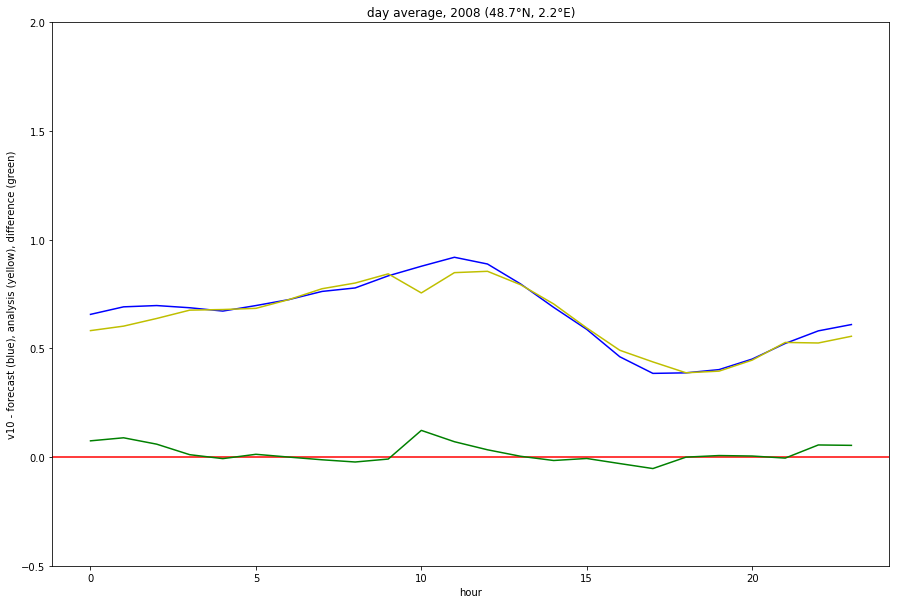

In [306]:
# plot time series
dsloc1['v10'].plot.line('b-',figsize=(15,10))
dsloc2['v10'].plot.line('y-')

# change y axis to show zero reference and difference plot
plt.ylim((-0.5,2))

# plot zero reference line
plt.axhline(0, color='red')

# plot difference
(dsloc1['v10']-dsloc2['v10']).plot.line('g-')

# add titles
plt.ylabel('v10 - forecast (blue), analysis (yellow), difference (green)')
plt.title('day average, 2008 (48.7°N, 2.2°E)')